Formation OpenClassrooms DS-IML

**Projet 2**

Par **Marc Lefèvre**, <marc.lefevre@noos.fr>

# ANALYSE DE DONNÉES EXPLORATOIRE : Open Food Facts

## 1ère Partie

Dans le but d'éventuellement créer un moteur de recommandation, nous allons procéder à une analyse de données exploratoire du dataset **Open Foot Fact**. Il s'agira en fin de compte de décider si ce dataset contient suffisament de données à la fois de bonne qualité et pertinente en vue de la réalisation de notre projet.

Les données proviennent de l'adresse suivante d'où elles ont été téléchargées :<br>https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv

### Préliminaires

Récupération des données et chargement des bibliothèques Python que nous allons utiliser.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Data/en.openfoodfacts.org.products.csv", sep = "\t", encoding = "utf-8")

Premières observations sur le dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443749 entries, 0 to 1443748
Columns: 181 entries, code to carnitine_100g
dtypes: float64(123), int64(2), object(56)
memory usage: 1.9+ GB


Le dataset est assez massif. Il compte **1443749** observations (*lignes*) renseignées par **181** variables (*colonnes*) et prends près de **2go**.<br>Regardons maintenant de quel façon le set est *peuplé*, c'est à dire la proportion de données renseignées par variables.

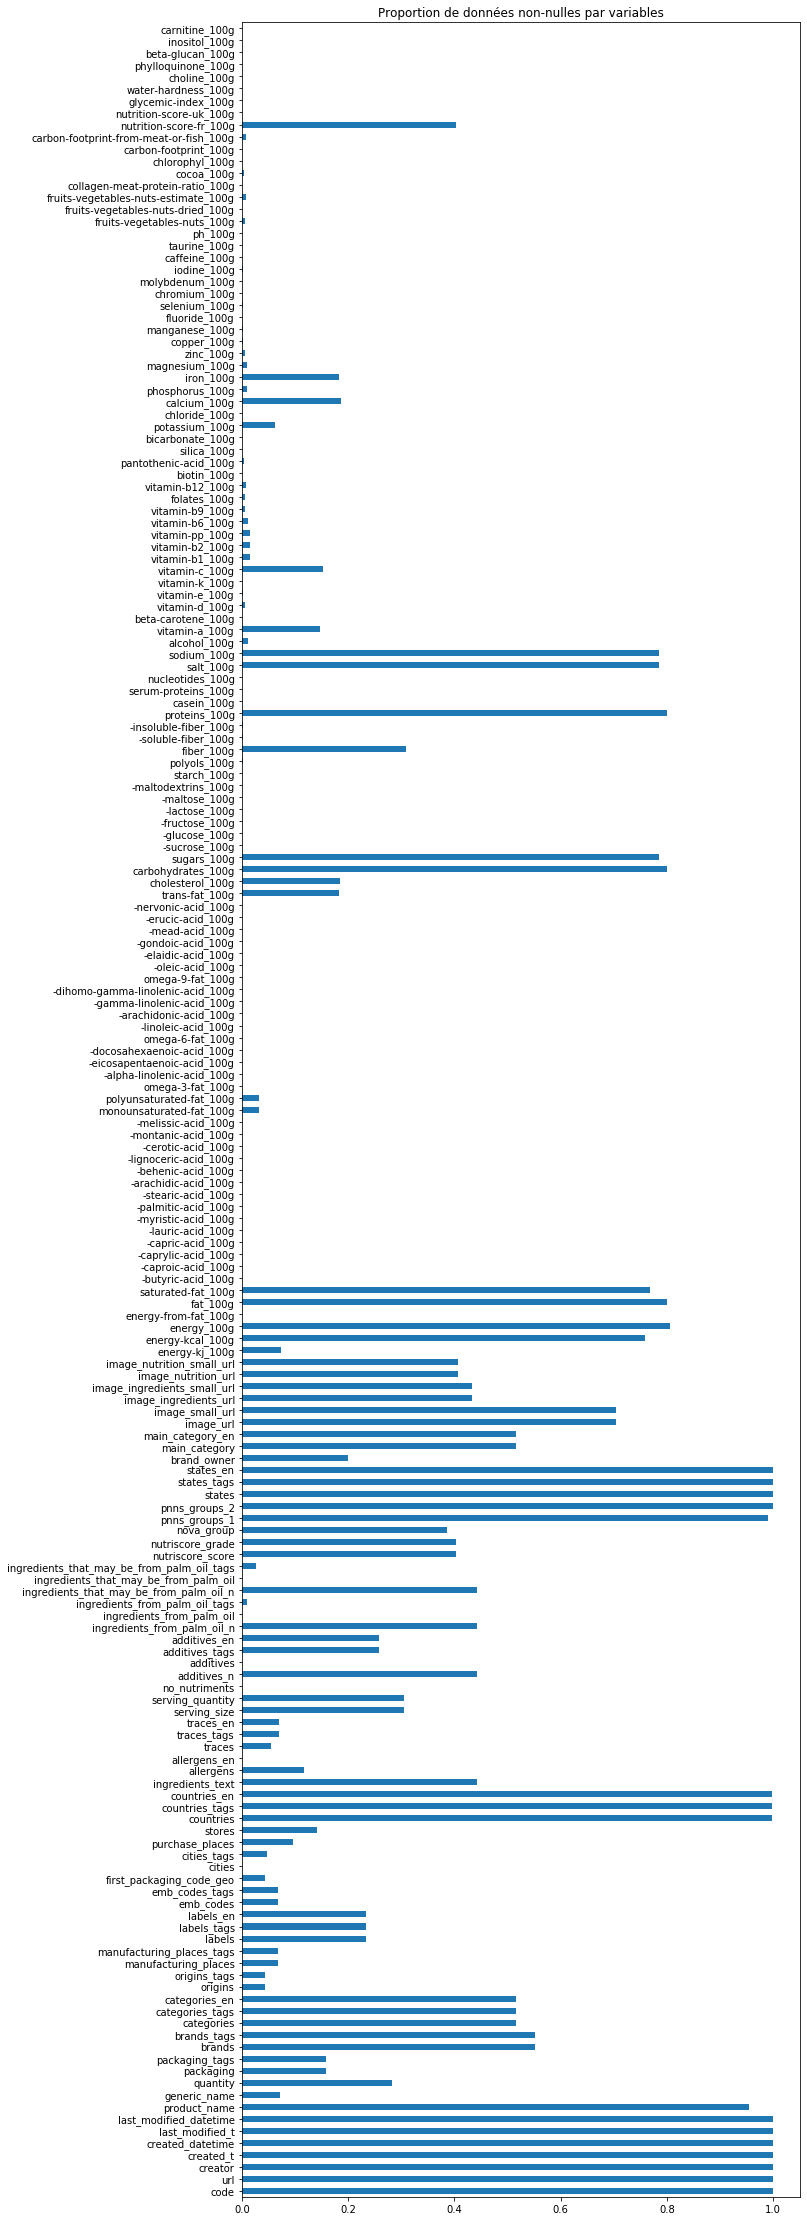

In [6]:
plt.figure(figsize = (10,40))
df.notnull().mean().plot.barh()
plt.title('Proportion de données non-nulles par variables')
plt.show()

Nous pouvons observer que les données sont très inégalement réparties et que le set est en large part vide. Dès lors nous décidons dans un premier temps d'effectuer une **réduction** du dataset et allons décider avec quelles variables nous allons travailler pour la suite.
Cette sélection va se faire sur une balance de deux critères principaux : les variables doivent être **pertinentes** au regard de notre but final, et **consistantes**, c'est à dire un minimum renseignées.


## Réduction du Dataset

Afin d'opérer cette réduction, nous allons observer le dataset en le prenant par "tranches". Ces tranches suivent le *découpage* opéré et détaillé par les producteurs des données dans la notice descriptive accompagnant le dataset.<br><https://static.openfoodfacts.org/data/data-fields.txt> <br>A partir de la liste totale des colonnes du dataset, on va extraire des sous-listes correspondants à ces regroupements d'infos.

In [7]:
# liste totale
liste_totale = df.columns.tolist()
print(liste_totale)

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'serving_quantity', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutriscore_score', 'nutriscore_grade', '

In [8]:
# Sous-listes

# liste des données d'informations générales : colonnes "code" -> "quantity" 
liste_gi = ['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t',
            'last_modified_datetime', 'product_name', 'generic_name', 'quantity']
# Liste "tags" : "packaging" -> "countries_en"
liste_tags = ['packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags',
              'categories_en', 'origins', 'origins_tags', 'manufacturing_places',
              'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes',
              'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places',
              'stores', 'countries', 'countries_tags', 'countries_en']
# Liste "ingredients" & "misc" : "ingredients_text" -> "image_nutrition_small_url". 2 listes
liste_misc1 = ['ingredients_text', 'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en',
              'serving_size', 'serving_quantity', 'no_nutriments', 'additives_n', 'additives',
              'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
              'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
              'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil']

liste_misc2 = ['ingredients_that_may_be_from_palm_oil_tags', 'nutriscore_score', 'nutriscore_grade',
              'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en',
              'brand_owner', 'main_category', 'main_category_en', 'image_url', 'image_small_url',
              'image_ingredients_url', 'image_ingredients_small_url', 'image_nutrition_url',
              'image_nutrition_small_url']
# Liste "nutrition facts" : reste des colonnes. 5 listes
liste_nutri1 =['energy-kj_100g', 'energy-kcal_100g', 'energy_100g', 'energy-from-fat_100g', 'fat_100g',
               'saturated-fat_100g', '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g',
               '-capric-acid_100g', '-lauric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g',
               '-stearic-acid_100g', '-arachidic-acid_100g', '-behenic-acid_100g',
               '-lignoceric-acid_100g', '-cerotic-acid_100g', '-montanic-acid_100g',
               '-melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g']

liste_nutri2 =['omega-3-fat_100g', '-alpha-linolenic-acid_100g', '-eicosapentaenoic-acid_100g',
               '-docosahexaenoic-acid_100g', 'omega-6-fat_100g', '-linoleic-acid_100g',
               '-arachidonic-acid_100g', '-gamma-linolenic-acid_100g', '-dihomo-gamma-linolenic-acid_100g',
               'omega-9-fat_100g', '-oleic-acid_100g', '-elaidic-acid_100g', '-gondoic-acid_100g',
               '-mead-acid_100g', '-erucic-acid_100g', '-nervonic-acid_100g', 'trans-fat_100g',
               'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', '-sucrose_100g', '-glucose_100g']

liste_nutri3 =['-fructose_100g', '-lactose_100g', '-maltose_100g', '-maltodextrins_100g', 'starch_100g',
               'polyols_100g', 'fiber_100g', '-soluble-fiber_100g', '-insoluble-fiber_100g',
               'proteins_100g', 'casein_100g', 'serum-proteins_100g', 'nucleotides_100g', 'salt_100g',
               'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g',
               'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g',
               'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g']

liste_nutri4 =['vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g',
               'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g',
               'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g',
               'fluoride_100g', 'selenium_100g', 'chromium_100g', 'molybdenum_100g', 'iodine_100g',
               'caffeine_100g', 'taurine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g']

liste_nutri5 =['fruits-vegetables-nuts-dried_100g', 'fruits-vegetables-nuts-estimate_100g',
               'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
               'carbon-footprint_100g', 'carbon-footprint-from-meat-or-fish_100g',
               'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'glycemic-index_100g',
               'water-hardness_100g', 'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
               'inositol_100g', 'carnitine_100g']

## Exploration tranche **Informations générales**

In [9]:
df_gi = df[liste_gi]
df_gi.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc


In [10]:
df_gi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443749 entries, 0 to 1443748
Data columns (total 10 columns):
code                      1443749 non-null object
url                       1443749 non-null object
creator                   1443745 non-null object
created_t                 1443749 non-null int64
created_datetime          1443749 non-null object
last_modified_t           1443749 non-null int64
last_modified_datetime    1443749 non-null object
product_name              1378190 non-null object
generic_name              104368 non-null object
quantity                  408204 non-null object
dtypes: int64(2), object(8)
memory usage: 110.1+ MB


De cette première tranche de variables qualitatives, nous décidons de garder d'abord les champs **code-barre** et **URLs** (potentiellement utiles pour notre moteur...), ainsi que les **deux variables "texte"** relatives aux nomx des produits. Les autres sont des métadata que nous ne jugeons pas opportunes de garder.<br>Nous rangerons pour chaque tranche les variables gardées dans une liste. Ici :

In [11]:
liste_gi_p = ["code", "url", "product_name", "generic_name"]

## Exploration tranche **Tags**

In [12]:
df_tags = df[liste_tags]
df_tags.head(5)

,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,...,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain
3,NaN,NaN,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,courte paille,France,en:france,France
4,NaN,NaN,Watt,watt,Xsf,fr:xsf,fr:xsf,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:France,en:france,France


In [13]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443749 entries, 0 to 1443748
Data columns (total 24 columns):
packaging                    229162 non-null object
packaging_tags               229151 non-null object
brands                       795370 non-null object
brands_tags                  795317 non-null object
categories                   743518 non-null object
categories_tags              743516 non-null object
categories_en                743516 non-null object
origins                      62445 non-null object
origins_tags                 62341 non-null object
manufacturing_places         99244 non-null object
manufacturing_places_tags    99205 non-null object
labels                       337305 non-null object
labels_tags                  337328 non-null object
labels_en                    337328 non-null object
emb_codes                    98021 non-null object
emb_codes_tags               97995 non-null object
first_packaging_code_geo     62240 non-null object
cities    

Dans cette nouvelle tranche du dataset, nous sommes encore en présence de données qualitatives nominales. Nous éliminons d'office ce qui touche au packaging, aux origines des produits, à leurs lieux de fabrications, aux villes, magasins et lieux d'achats. Ces données nous sembles à la fois peu pertinentes et peu renseignées.<br><br>Il nous reste maintenant des groupes de variables aux **intitulés et consistences** presque **similaires** (*brands, categories, lanels, countries...*)<br>Penchons nous sur **"brands"** et **"brands_tags"**.

In [14]:
df_tags.brands_tags.value_counts()

carrefour                     13558
auchan                        11024
u                              6105
bonarea                        5455
nestle                         5253
                              ...  
ingredients-service-plus          1
chiusa-grande                     1
ayataka,coca-cola                 1
salon-des-thes                    1
hi-continental-corporation        1
Name: brands_tags, Length: 109624, dtype: int64

In [15]:
df_tags.brands_tags.value_counts()

carrefour                     13558
auchan                        11024
u                              6105
bonarea                        5455
nestle                         5253
                              ...  
ingredients-service-plus          1
chiusa-grande                     1
ayataka,coca-cola                 1
salon-des-thes                    1
hi-continental-corporation        1
Name: brands_tags, Length: 109624, dtype: int64

Leurs contenus respectifs semblent **redondants**. Regardons si ces variables couvrent les mêmes données.

In [16]:
# Nombre d'observations pour lesquelles "brands_tags" est définie et "brands" est nulle :
len(df_tags[(df_tags.brands_tags.notnull()) & (df_tags.brands.isnull())])

8

In [17]:
# Nombre d'observations pour lesquelles "brands" est définie et "brands_tags" est nulle :
len(df_tags[(df_tags.brands_tags.isnull()) & (df_tags.brands.notnull())])

61

Nous en concluons que ces deux variables sont en effet **redondantes** et choisissons de garder **"brands"**.<br>En procédant de la sorte avec les trois variables *"categories", "labels" et "countries"* nous choisissons de garder **"categories"**, et **"labels"**.<br>Garder une variable "pays" nous intéresse car elle pourrait nous permettre de filtrer plus tard le champ d'action de notre moteur à des produits de la sphère francophone. Parmi ces variables **"countries_en"** semble la mieux définie.

In [18]:
df_tags.countries_en.value_counts()

France                                                                639322
United States                                                         326864
Spain                                                                 160053
Belgium                                                                38583
Germany                                                                37159
                                                                       ...  
Egypt,Turkey,United States                                                 1
France,Germany,Spain,Sweden,Switzerland                                    1
Austria,Seychelles                                                         1
Belgium,France,Ireland,Luxembourg,Netherlands,Spain                        1
Denmark,Finland,Germany,Italy,Portugal,Spain,Sweden,United Kingdom         1
Name: countries_en, Length: 3305, dtype: int64

De cette tranche **Tags** nous gardons donc les variables suivantes :

In [19]:
liste_tags_p = ["brands", "categories", "labels", "countries_en"]

## Exploration tranches **Ingredients** et **MISC**

En raison du nombres de variables, nous la faisons en deux parties.

In [20]:
df_misc1 = df[liste_misc1]
df_misc1.head(5)

,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,eau graines de téguments de moutarde vinaigre ...,en:mustard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_misc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443749 entries, 0 to 1443748
Data columns (total 18 columns):
ingredients_text                           640108 non-null object
allergens                                  168478 non-null object
allergens_en                               0 non-null float64
traces                                     80581 non-null object
traces_tags                                101592 non-null object
traces_en                                  101592 non-null object
serving_size                               440298 non-null object
serving_quantity                           440779 non-null float64
no_nutriments                              0 non-null float64
additives_n                                640108 non-null float64
additives                                  0 non-null float64
additives_tags                             371718 non-null object
additives_en                               371718 non-null object
ingredients_from_palm_oil_n             

De cette tranche nous gardons, les listes d'ingrédients, la variable relative aux allergènes (pertinente bien que peu renseignée), le nombre d'additifs et les noms de ces additifs, ainsi que les deux variables renseignées relatives à **l'huile de palme**.

In [24]:
liste_misc1_p = ["ingredients_text", "allergens", "additives_n", "additives_en", 
                  "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n"]

In [25]:
df_misc2 = df[liste_misc2]
df_misc2.head(5)

,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
0,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN
1,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...
3,NaN,18.0,d,NaN,Fat and sauces,Dressings and sauces,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,en:mustards,Mustards,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,fr:xsf,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_misc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443749 entries, 0 to 1443748
Data columns (total 18 columns):
ingredients_that_may_be_from_palm_oil_tags    37879 non-null object
nutriscore_score                              582895 non-null float64
nutriscore_grade                              582895 non-null object
nova_group                                    556104 non-null float64
pnns_groups_1                                 1429255 non-null object
pnns_groups_2                                 1443143 non-null object
states                                        1443749 non-null object
states_tags                                   1443749 non-null object
states_en                                     1443749 non-null object
brand_owner                                   289283 non-null object
main_category                                 743516 non-null object
main_category_en                              743516 non-null object
image_url                                     1017249

De cette tranche les variables **nutriscore** (**score** et **grade**), ansi que **nova_group**, un indicateur du degré de transformation des produits. Nous gardons aussi les deux **pnns_groups** et **main_category_en** qui sont des variables qualitatives *texte* qui pourraient nous êtres utiles.

In [27]:
liste_misc2_p = ["nutriscore_score", "nutriscore_grade", "nova_group", "pnns_groups_1", "pnns_groups_2", 
                  "main_category_en"]

## Exploration tranche **Nutrition Facts**

Cette tranche contient de variables quantitatives concernant les caractéristiques nutritionnelles des produits.<br>Elle est également la plus clairsemmées du dataset.<br>D'office, nous décidons de garder les quelques variables bien renseignées, ainsi que quelques autres qui le sont bien moins, mais concernent des éléments nutritionnels importants pour le public (*cholesterol, vitamine C, vitamine A, glucides, etc.*). 

In [28]:
liste_nutri_p = ["energy-kcal_100g", "energy_100g", "fat_100g", "saturated-fat_100g","trans-fat_100g", 
                 "cholesterol_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", 
                 "salt_100g", "sodium_100g", "vitamin-a_100g", "vitamin-c_100g", "calcium_100g", "iron_100g"]

À noter que la variable "nutrition-score-fr_100g" est un doublon de "nutriscore_score" déjà gardée. On l'élimine donc.

In [29]:
len(df[df.nutriscore_score == df["nutrition-score-fr_100g"]]) == len(df[df.nutriscore_score.notnull()])

True

## Réduction du dataset

Au final, la liste des variables que nous avons jugées utiles d'être gardées est la suivante :

In [30]:
liste_p = (liste_gi_p + liste_tags_p + liste_misc1_p + liste_misc2_p + liste_nutri_p)
print(liste_p)

['code', 'url', 'product_name', 'generic_name', 'brands', 'categories', 'labels', 'countries_en', 'ingredients_text', 'allergens', 'additives_n', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score', 'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'main_category_en', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g']


Nous en tirons un nouveau dataset bien plus resreint qui sera notre future base de travail.<br>Après avoir ré-ordonné un peu différemment l'ordre des colonnes, nous le sauvegardons sous le nom de **"df_red1.csv"**

In [31]:
liste_p = ['code', 'url', 'countries_en','product_name', 'generic_name', 'brands', 'categories', 'main_category_en', 
           'labels', 'ingredients_text', 'pnns_groups_1', 'pnns_groups_2', 'allergens', 'additives_en', 
           'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nova_group', 
           'nutriscore_score', 'nutriscore_grade','energy-kcal_100g', 'energy_100g', 'fat_100g', 
           'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 
           'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 
           'calcium_100g', 'iron_100g']

In [32]:
df_red1 = df[liste_p]
df_red1.to_csv("Data/df_red1.csv", index=False)

Fin de la **1ère partie**.